In [673]:
import pandas as pd
import numpy as np
import pandas_profiling
# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [674]:
df3 = pd.read_csv('datasets/cardio_train.csv', delimiter=';')
print(df3.shape)
df3.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Getting information

In [675]:
df3.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Checking for null values 

In [676]:
#df3.isnull().sum()
#df3.isna().sum()

#### Checking for extreme values

<AxesSubplot:>

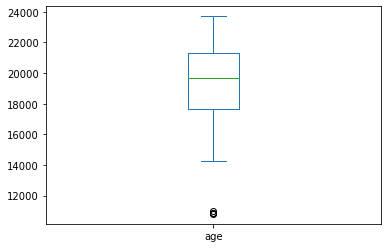

In [677]:
df3['age'].plot.box()

<AxesSubplot:>

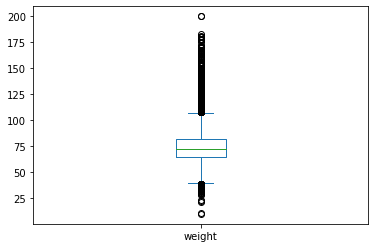

In [678]:
df3['weight'].plot.box()

<AxesSubplot:>

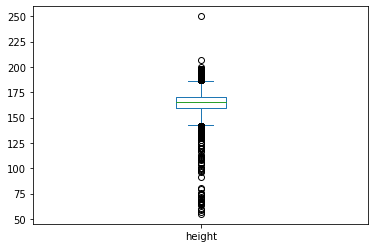

In [679]:
df3['height'].plot.box()

<AxesSubplot:>

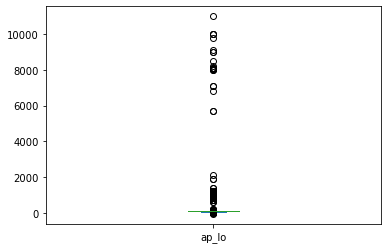

In [680]:
df3['ap_lo'].plot.box()

<AxesSubplot:>

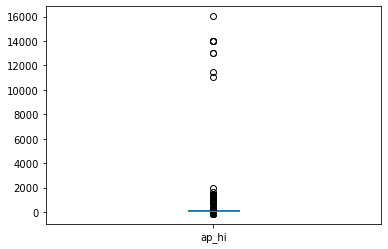

In [681]:
df3['ap_hi'].plot.box()

<AxesSubplot:>

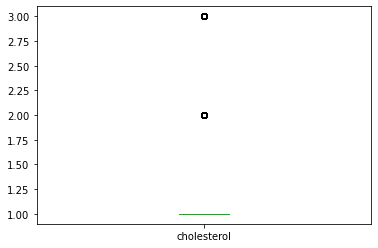

In [694]:
df3['cholesterol'].plot.box()


In [682]:
df3.drop(df3.index[df3['age'] < 4000], inplace=True)

In [683]:
df3.drop(df3.index[df3['weight'] < 40], inplace=True)
df3.drop(df3.index[df3['weight'] > 180], inplace=True)

In [684]:
df3.drop(df3.index[df3['height'] < 150], inplace=True)
df3.drop(df3.index[df3['height'] > 200], inplace=True)

In [685]:
df3.drop(df3.index[df3['ap_hi'] > 165], inplace=True)
df3.drop(df3.index[df3['ap_hi'] < 90], inplace=True)

In [686]:
df3.drop(df3.index[df3['ap_lo'] > 110], inplace=True)
df3.drop(df3.index[df3['ap_lo'] < 65], inplace=True)

<AxesSubplot:>

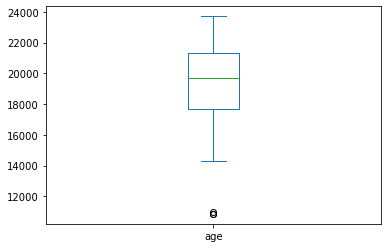

In [687]:
df3['age'].plot.box()

<AxesSubplot:>

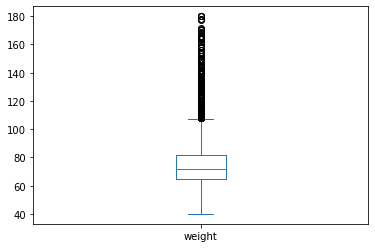

In [688]:
df3['weight'].plot.box()

<AxesSubplot:>

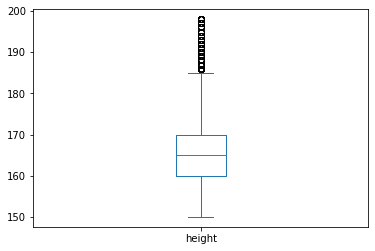

In [689]:
df3['height'].plot.box()

<AxesSubplot:>

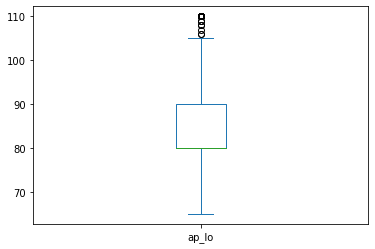

In [690]:
df3['ap_lo'].plot.box()

<AxesSubplot:>

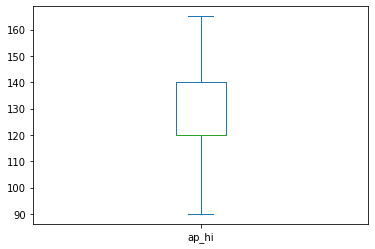

In [691]:
df3['ap_hi'].plot.box()

#### Changed the age from days to years

In [625]:
df3['age']=df3['age']/365

#### Changed the age into a int

In [626]:
df3['age']=df3['age'].astype(int)


#### thought it would be nice to now use the data I have to get new data
#### The BMI

#### I change height to be in meters

In [627]:
df3['height']=df3['height']/100

#### Run the formular

In [628]:
height2=(df3['height'])*(df3['height']);
df3['bmi']=(df3['weight']/height2)
df3['bmi']=df3['bmi'].astype(int)
df3['extremebmi']=(df3['bmi']>45)
df3

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,extremebmi
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21,False
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34,False
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,23,False
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28,False
5,8,60,1,1.51,67.0,120,80,2,2,0,0,0,0,29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,1.65,80.0,150,80,1,1,0,0,1,1,29,False
69995,99993,52,2,1.68,76.0,120,80,1,1,1,0,1,0,26,False
69996,99995,61,1,1.58,126.0,140,90,2,2,0,0,1,1,50,True
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27,False


<AxesSubplot:>

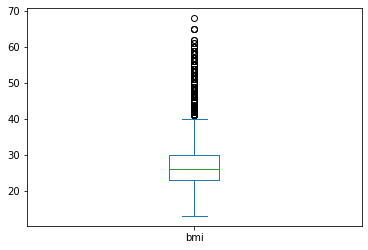

In [629]:
df3['bmi'].plot.box()


In [630]:
df3.drop(df3.index[df3['bmi'] < 13], inplace=True)
df3.drop(df3.index[df3['bmi'] > 120], inplace=True)

df3['bmi'].max()

68

##### pandas_profiling.ProfileReport(df3).to_file("cardio.html")


#### In this picture under, you can see that chol, bmi, weight and age all correlate with cardiovascular disease

In [631]:
corr = df3.corr(method="pearson")
cmap = sns.cm.vlag_r
corr.style.background_gradient(cmap=cmap)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,extremebmi
id,1.000000,0.003547,0.004988,0.000843,0.001475,0.006418,0.003351,0.007073,0.003471,-0.002066,0.000048,0.004988,0.005989,0.000652,-0.003893
age,0.003547,1.000000,-0.029027,-0.084883,0.047012,0.196244,0.136374,0.150052,0.095675,-0.049457,-0.029487,-0.010423,0.229783,0.091892,0.003454
gender,0.004988,-0.029027,1.000000,0.522069,0.147584,0.047285,0.051447,-0.038747,-0.023324,0.335969,0.169548,0.007141,-0.000036,-0.112684,-0.036540
height,0.000843,-0.084883,0.522069,1.000000,0.296171,0.004641,0.018681,-0.055060,-0.023693,0.194373,0.097031,-0.010173,-0.017401,-0.193105,-0.040560
weight,0.001475,0.047012,0.147584,0.296171,1.000000,0.243388,0.220711,0.140324,0.103184,0.065285,0.064993,-0.015162,0.166527,0.874435,0.285878
ap_hi,0.006418,0.196244,0.047285,0.004641,0.243388,1.000000,0.709271,0.191926,0.087899,0.025361,0.029608,0.001742,0.431645,0.246155,0.043377
ap_lo,0.003351,0.136374,0.051447,0.018681,0.220711,0.709271,1.000000,0.155364,0.066090,0.023280,0.033848,0.000673,0.333253,0.215687,0.036923
cholesterol,0.007073,0.150052,-0.038747,-0.055060,0.140324,0.191926,0.155364,1.000000,0.453117,0.010044,0.031420,0.008963,0.218209,0.170307,0.027854
gluc,0.003471,0.095675,-0.023324,-0.023693,0.103184,0.087899,0.066090,0.453117,1.000000,-0.006289,0.008221,-0.006946,0.084487,0.116698,0.033857
smoke,-0.002066,-0.049457,0.335969,0.194373,0.065285,0.025361,0.023280,0.010044,-0.006289,1.000000,0.342553,0.024765,-0.018748,-0.030837,-0.008684


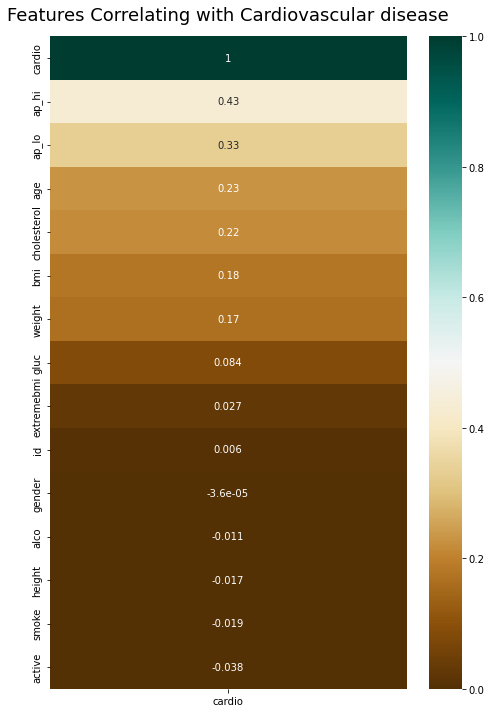

In [632]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['cardio']].sort_values(by='cardio', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cardiovascular disease', fontdict={'fontsize':18}, pad=16);

#### also found it interesting that chol and gluc had such a high correlation

#### Setting up data to be more graphical ready

In [633]:
stats=df3.copy()
def prepareForStats():
    ranges1 = [10,20,30,40,50,60,70,80,90,100]
    stats['bmi']=pd.cut(stats.bmi, ranges)
    ranges2 = [0,10,20,30,40,50,60,70,80,90,100]
    stats['age']=pd.cut(df3.age, ranges)

In [634]:
prepareForStats();

<AxesSubplot:xlabel='gender'>

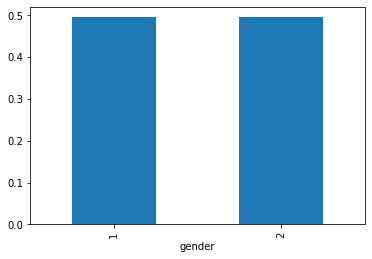

In [635]:
stats.groupby('gender')['cardio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='cholesterol'>

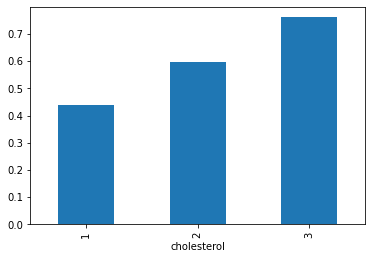

In [695]:
stats.groupby('cholesterol')['cardio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='cholesterol'>

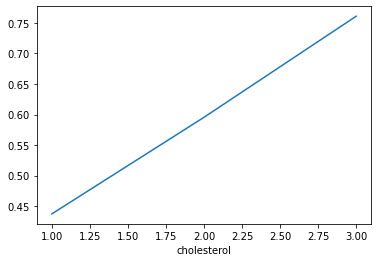

In [636]:
stats.groupby('cholesterol')['cardio'].mean().plot(kind='line')

<AxesSubplot:ylabel='cardio'>

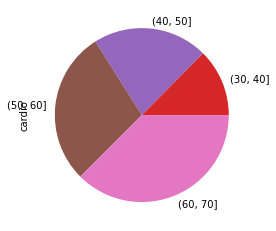

In [637]:
stats.groupby('age')['cardio'].mean().plot(kind='pie')

<AxesSubplot:xlabel='bmi'>

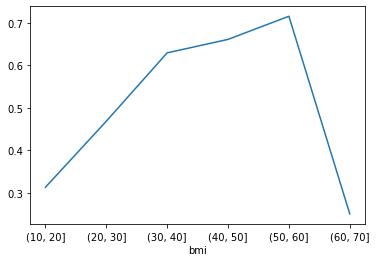

In [638]:
stats.groupby('bmi')['cardio'].mean().plot(kind='line')

### Deciding on the values to use for the model

In [ ]:
heartModelData=df3[['bmi', 'age', 'cholesterol','ap_lo','ap_hi','weight','cardio']].copy()
heartModelData

In [640]:
# Convert the dataset into two arrays

array = heartModelData.values
# Create two (sub) arrays from it
X = array[:,0:6] # data without class
y = array[:,7]   # just class
X
heartModelData

,bmi,age,cholesterol,ap_lo,ap_hi,gluc,weight,cardio
0,21,50,1,80,110,1,62.0,0
1,34,55,3,90,140,1,85.0,1
2,23,51,3,70,130,1,64.0,1
3,28,48,1,100,150,1,82.0,1
5,29,60,2,80,120,2,67.0,0
...,...,...,...,...,...,...,...,...
69994,29,57,1,80,150,1,80.0,1
69995,26,52,1,80,120,1,76.0,0
69996,50,61,2,90,140,2,126.0,1
69998,27,61,1,80,135,2,72.0,1


In [653]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2, random_state=25)

In [654]:
X_train

array([[ 29.,  49.,   3.,  80., 120.,   1.],
       [ 23.,  56.,   1.,  80., 120.,   1.],
       [ 22.,  54.,   1.,  80., 120.,   1.],
       ...,
       [ 24.,  50.,   1.,  80., 120.,   1.],
       [ 23.,  55.,   1.,  70., 110.,   1.],
       [ 23.,  58.,   1.,  80., 120.,   1.]])

In [655]:
Y_train

array([0., 0., 0., ..., 0., 0., 0.])

# Improving model / finding better model

In [656]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.ensemble as ske
from sklearn.cluster import KMeans

In [657]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Forrest',ske.RandomForestClassifier()))
#models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Logression',LogisticRegression()))
#models.append(('Kmeans',KMeans()))
models.append(('SVC',SVC()))

In [658]:
# value for seed to be used in all tests
seed = 7

#  the number of repeated trainings of one model
num_repeat = 10

In [659]:
scoring = 'accuracy'

In [660]:
results = []
names = []
def runModelFitting():
    for name, model in models:
        # prepare randomization of splits
        kfold = model_selection.KFold(n_splits=num_repeat, random_state=seed, shuffle=True)

        # implement the model and calculate a score based on 'accuracy' (scoring)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        # store the result of this method in array results[]
        results.append(cv_results)

        # store the name of this method in array names[]
        names.append(name)

        # tell what you have done so far
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
# repeat the same for next method

In [661]:
#runModelFitting();

KNN: 0.683661 (0.012746)
NB: 0.706524 (0.010917)
Forrest: 0.679598 (0.009598)


C:\Users\matti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logression: 0.719349 (0.007939)
SVC: 0.710428 (0.009528)


### Top 3: Logression, SVC and NB
#### Now that I know they are the best I will look closer at different metrics

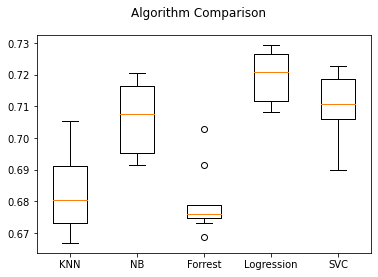

In [662]:
# Compare algorithms frame
fig = plt.figure()
fig.suptitle('Algorithm Comparison')

# x axis includes sub-plots
ax = fig.add_subplot(111)

# y axis result values
plt.boxplot(results)

# x axis labels
ax.set_xticklabels(names)

plt.show()

In [663]:

log = LogisticRegression()
log.fit(X_train, Y_train)
predictions = log.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(Y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(Y_test, predictions))

0.7179160360073289
[[4906 1333]
 [2208 4106]]
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.73      6239
         1.0       0.75      0.65      0.70      6314

    accuracy                           0.72     12553
   macro avg       0.72      0.72      0.72     12553
weighted avg       0.72      0.72      0.72     12553



In [664]:
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(Y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(Y_test, predictions))

0.7147295467218991
[[5094 1145]
 [2436 3878]]
              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74      6239
         1.0       0.77      0.61      0.68      6314

    accuracy                           0.71     12553
   macro avg       0.72      0.72      0.71     12553
weighted avg       0.72      0.71      0.71     12553



In [665]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(Y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(Y_test, predictions))

0.703576834222895
[[4983 1256]
 [2465 3849]]
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73      6239
         1.0       0.75      0.61      0.67      6314

    accuracy                           0.70     12553
   macro avg       0.71      0.70      0.70     12553
weighted avg       0.71      0.70      0.70     12553



In [ ]:
df3.describe()

In [ ]:
print(df3.shape)
